# Fruit classification

## Apple, Banana, Orange

## Train, Valid, Test

## ~70%/15%/15%

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator

2023-10-19 10:34:37.555854: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 1, Training
## Define CNN model

Input shape 64x64x3, dense, dense, dense

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

num_classes = 6

model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=256, activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_classes, activation="softmax"))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 64, 64, 75)        2100      
                                                                 
 batch_normalization_6 (Batc  (None, 64, 64, 75)       300       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 75)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 50)        33800     
                                                                 
 dropout_4 (Dropout)         (None, 32, 32, 50)        0         
                                                                 
 dense_6 (Dense)             (None, 32, 32, 256)      

## Define train/valid directory and images (64x64)

In [6]:
TRAINING_DIR = "data/fresh_rotten/train"
train_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=10, 
                                                    target_size=(64, 64))

# VALIDATION_DIR = "data/fresh_rotten/valid"
# validation_datagen = ImageDataGenerator(rescale=1.0/255)

# validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
#                                                          batch_size=10, 
#                                                          target_size=(64, 64)) 

Found 10901 images belonging to 6 classes.


## Train and save the model

In [9]:
history = model.fit(train_generator,
                    epochs=5)
model.save("fruit_3.h5")

Epoch 1/5


2023-10-19 10:47:35.050139: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1091/1091 [==============================] - 194s 176ms/step - loss: 0.6534 - accuracy: 0.7974
Epoch 2/5
1091/1091 [==============================] - 178s 163ms/step - loss: 0.3376 - accuracy: 0.8851
Epoch 3/5
1091/1091 [==============================] - 163s 150ms/step - loss: 0.2660 - accuracy: 0.9111
Epoch 4/5
1091/1091 [==============================] - 167s 153ms/step - loss: 0.2296 - accuracy: 0.9242
Epoch 5/5
1091/1091 [==============================] - 144s 132ms/step - loss: 0.1926 - accuracy: 0.9369


## See the training accuracy/loss

dict_keys(['loss', 'accuracy'])


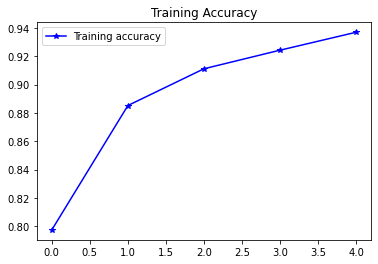

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

print(history.history.keys())
epochs=5

acc = history.history['accuracy']
loss = history.history['loss']

plt.plot(range(epochs), acc, 'b*-', label = 'Training accuracy')
plt.title('Training Accuracy')
plt.legend()

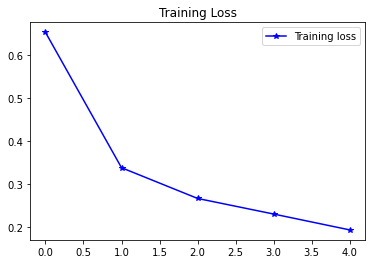

In [12]:
plt.plot(range(epochs), loss, 'b*-', label = 'Training loss')
plt.title('Training Loss')
plt.legend()

# 2, Inference

## First, load the trained model, then image to predict

1/1 [==============================] - 0s 380ms/step


array([[0., 1., 0., 0., 0., 0.]], dtype=float32)

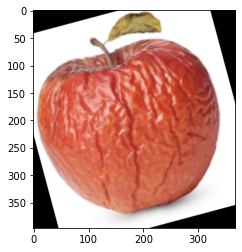

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow import keras

model = keras.models.load_model('fruit_3.h5')

image_path = 'data/fresh_rotten/train/rottenapples/rotated_by_15_Screen Shot 2018-06-07 at 2.15.20 PM.png'

image = mpimg.imread(image_path)
plt.imshow(image)

def make_prediction(image_path):
    image = image_utils.load_img(image_path, target_size=(64, 64))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,64,64,3)
    image = preprocess_input(image)
    preds = model.predict(image)
    return preds

make_prediction('data/fresh_rotten/train/rottenapples/rotated_by_15_Screen Shot 2018-06-07 at 2.15.20 PM.png')

## It's better to define the mapping for index/name

In [30]:
import numpy as np

image_mapping = {0: 'freshapples', 1: 'freshoranges', 2: 'freshbanana', 3: 'rottenapples', 4: 'rottenbanana', 5: 'rottenoranges'}
    
print(image_mapping[np.argmax(make_prediction('data/fresh_rotten/test/rottenapples/rotated_by_15_Screen Shot 2018-06-07 at 2.18.25 PM.png'))])

1/1 [==============================] - 0s 91ms/step
freshoranges


## Run the model inference for "test" dataset

In [31]:
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_it = test_datagen.flow_from_directory('data/fruitdata/test/', 
                                       target_size=(64, 64), 
                                       batch_size=1, 
                                       shuffle=False,
                                       class_mode="categorical")

pred_output = model.predict(test_it)
print(pred_output)
pred_output = np.argmax(pred_output, axis=1)
print(pred_output)

Found 146 images belonging to 8 classes.


  1/146 [..............................] - ETA: 29s

2023-10-19 11:28:27.261630: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


146/146 [==============================] - 4s 25ms/step
[[9.99996901e-01 2.53548013e-14 3.42759404e-14 3.14693398e-06
  3.63845273e-14 1.37040808e-14]
 [9.99751866e-01 1.32765191e-13 2.75716894e-10 2.48101831e-04
  3.47129145e-13 1.48045028e-13]
 [9.99994755e-01 1.04648300e-12 5.14005850e-15 5.28921964e-06
  7.04436618e-13 3.89788896e-13]
 [9.99973536e-01 4.83482143e-11 1.91358491e-17 2.64305600e-05
  6.92605999e-12 3.64643872e-15]
 [9.99981642e-01 7.84311071e-12 7.94215943e-17 1.83408811e-05
  2.91124953e-13 1.21755336e-14]
 [9.99667287e-01 1.56536339e-10 7.01442793e-10 3.32776835e-04
  1.86986848e-09 4.28099986e-11]
 [9.99957323e-01 2.95519631e-13 4.33269497e-11 4.26341285e-05
  1.35882706e-13 5.70532553e-13]
 [9.99974728e-01 9.02364017e-11 2.75840204e-08 2.52852478e-05
  2.86378478e-16 2.14677409e-09]
 [9.98853445e-01 3.17476015e-12 5.17269214e-08 1.14656962e-03
  4.16259666e-11 3.56072914e-11]
 [9.99899864e-01 1.55028559e-08 4.84467932e-07 9.95944501e-05
  1.58378334e-12 2.30088251

## See the classification report

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_it.classes, pred_output))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        32
           1       0.72      0.56      0.63        32
           2       0.00      0.00      0.00        10
           3       0.17      0.10      0.12        10
           4       0.00      0.00      0.00        32
           5       0.07      0.20      0.11        10
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00        10

    accuracy                           0.36       146
   macro avg       0.23      0.23      0.23       146
weighted avg       0.37      0.36      0.36       146



/Users/wendywang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wendywang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wendywang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## See the confusion matrix

Text(0.5, 1.0, 'Confusion matrix of model')

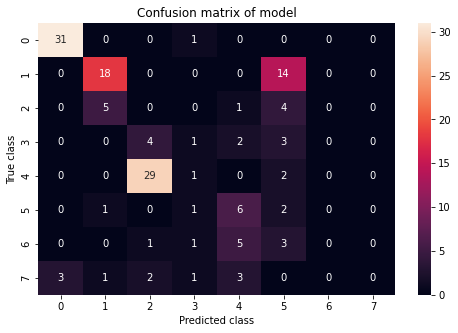

In [34]:
cf_matrix = confusion_matrix(test_it.classes, pred_output)

plt.figure(figsize=(8,5))
heatmap = sns.heatmap(cf_matrix, annot=True, fmt='d', color='blue')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion matrix of model')